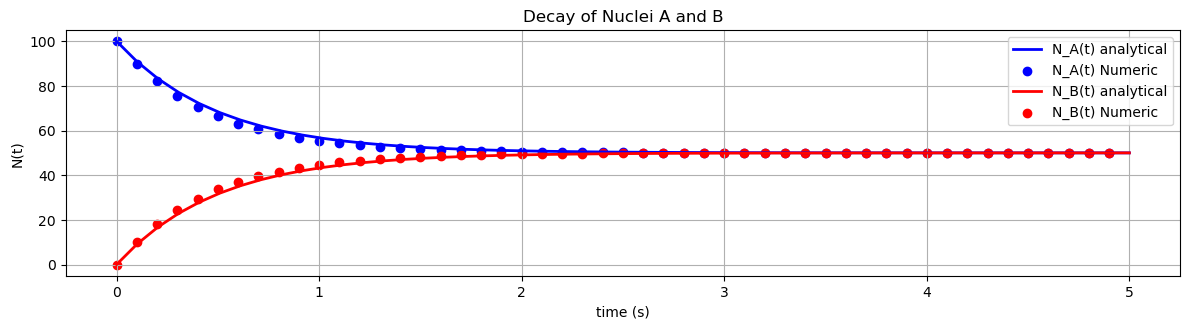

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions
tau = 1.0   # Time constant
N_A0 = 100  # Initial value of N_A
N_B0 = 0    # Initial value of N_B
t_total = 5  # Total simulation time
dt = 0.1    # Time step

# Time array
time = np.arange(0, t_total, dt)  

# Create arrays to store nuclei counts and initialize values
N_A = np.zeros_like(time)
N_B = np.zeros_like(time)
N_A[0] = N_A0
N_B[0] = N_B0

# Numerical solution using Euler's method
for i in range(1, len(time)):
    N_A[i] = N_A[i-1] + ((N_B[i-1] - N_A[i-1]) / tau) * dt
    N_B[i] = N_B[i-1] + ((N_A[i-1] - N_B[i-1]) / tau) * dt

# Analytical solution
# Time array
t_analytical = np.linspace(0, t_total, int(t_total/dt)) 
# Calculations for N_A and N_B
N_A_analytical = (N_A0 + N_B0) / 2 + ((N_A0 - N_B0) / 2) * np.exp(-2 * t_analytical / tau)
N_B_analytical = (N_A0 + N_B0) / 2 - ((N_A0 - N_B0) / 2) * np.exp(-2 * t_analytical / tau)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_analytical, N_A_analytical, label='N_A(t) analytical', color='blue', linewidth=2)
plt.scatter(time, N_A, label='N_A(t) Numeric', color='blue', marker='o')
plt.plot(t_analytical, N_B_analytical, label='N_B(t) analytical', color='red', linewidth=2)
plt.scatter(time, N_B, label='N_B(t) Numeric', color='red', marker='o')
plt.title('Decay of Nuclei A and B')
plt.xlabel('time (s)')
plt.ylabel('N(t)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('simulation_exercise_1.png') 
plt.show()